<a href="https://colab.research.google.com/github/rezaAdinepour/Persian-Handwritten-Digit-Recognition/blob/main/Hand_Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_6 (Flatten)         (None, 576)              

In [37]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 45s 59ms/step - loss: 0.2119 - accuracy: 0.9340 - val_loss: 0.0722 - val_accuracy: 0.9778
Epoch 2/10
750/750 [==============================] - 49s 66ms/step - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 3/10
750/750 [==============================] - 56s 75ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0532 - val_accuracy: 0.9822
Epoch 4/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0308 - accuracy: 0.9902 - val_loss: 0.0395 - val_accuracy: 0.9879
Epoch 5/10
750/750 [==============================] - 45s 59ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 6/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0446 - val_accuracy: 0.9882
Epoch 7/10
750/750 [==============================] - 44s 59ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.0414 - val_accuracy:

In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 3s 9ms/step - loss: 2.3068 - accuracy: 0.1083
Test accuracy: 10.83%


In [39]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(true_labels, predicted_labels)

313/313 [==============================] - 3s 9ms/step


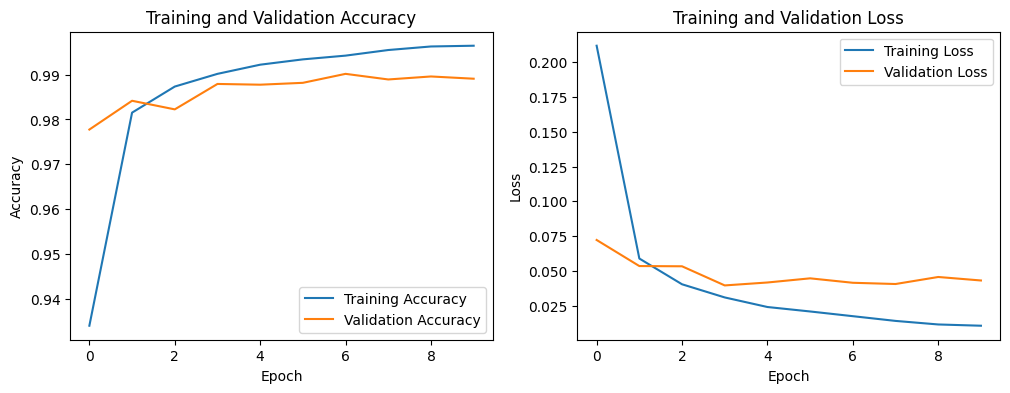

<Figure size 800x800 with 0 Axes>

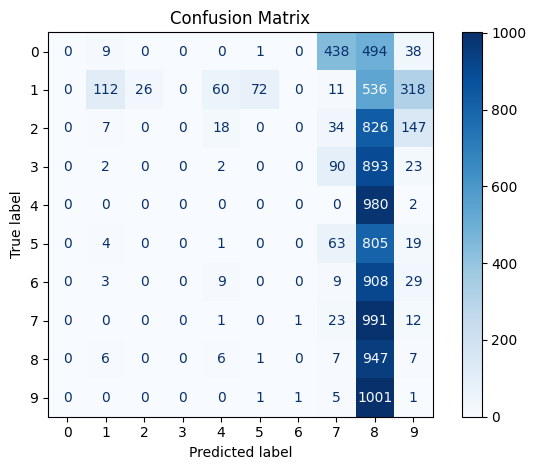

In [40]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title("Confusion Matrix")

plt.tight_layout()
plt.show()